In [12]:
def count_occurrences(file_name, p, q):
    count = 0
    with open(file_name, 'r') as file:
        for line in file:
            # Split the line into integers
            numbers = list(map(int, line.split()))
            # Check if the line is equal to p q
            if numbers == [p, q]:
                count += 1
    return count


In [13]:
import pandas as pd

df = pd.DataFrame(columns = [0,1,2,3,4,5], index = [0,1,2,3,4,5])
pd.set_option('future.no_silent_downcasting', True)
df = df.fillna(0).infer_objects(copy=False)

total_occurances = 0

for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        file_name = f"Results\\Hynd_ARMA_{p}_{q}.txt"  # Replace with the actual file name
        occurrences = count_occurrences(file_name, p, q)
        #print(f"The number of occurrences of {p} {q} is: {occurrences}")
        df.loc[p,q] = occurrences
        total_occurances += occurrences

df = round(df/500 * 100,1)
df

,0,1,2,3,4,5
0,83.2,65.6,55.0,32.8,22.4,13.8
1,66.0,44.4,46.2,25.4,18.2,16.8
2,57.2,49.8,50.6,32.6,22.4,17.4
3,48.6,36.4,37.2,28.4,21.6,18.8
4,49.4,36.0,35.4,31.2,23.0,23.6
5,40.8,38.8,36.8,29.8,25.0,22.2


In [14]:
print(f'Model Accuracy: {round(total_occurances/(500*36)* 100,2)} %')

Model Accuracy: 36.19 %


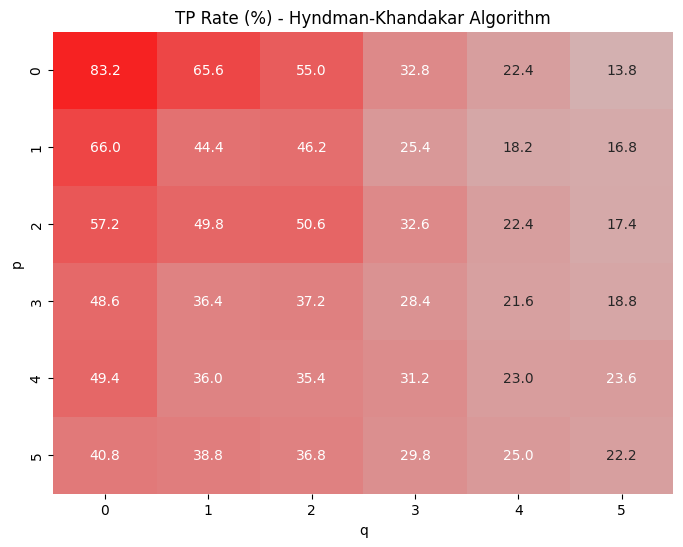

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap from light gray to red
colors = [(0.8, 0.8, 0.8), (1, 0, 0)]  # Light Gray to Red
cmap_name = 'light_gray_to_red'
n_bins = 10**5  # Discretization of the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a heatmap with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, fmt='.1f', vmin=0, vmax=100, cbar=False)
plt.title('TP Rate (%) - Hyndman-Khandakar Algorithm')
plt.xlabel('q')
plt.ylabel('p')
plt.savefig('hyndman_tp.pdf')
plt.show()


In [16]:
import numpy as np

def get_wrongs(p,q):
    file_name = f"Results\\Hynd_ARMA_{p}_{q}.txt"     
    values = []
    with open(file_name, 'r') as file:
        for line in file:
            # Split the line into integers
            numbers = list(map(int, line.split()))
            values.append(numbers)

    unique_values, counts = np.unique(values, return_counts=True, axis=0)
    unique_values, counts
    # tranform to dictionary
    result = [[p,q],dict(zip([tuple(i) for i in unique_values], counts))]

    return result

possibilities = 0
results = []
for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        possibilities += 1
        results.append(get_wrongs(p,q))

results

[[[0, 0],
  {(0, 0): 416,
   (0, 1): 7,
   (0, 2): 7,
   (1, 0): 19,
   (1, 1): 22,
   (1, 2): 1,
   (1, 3): 1,
   (2, 2): 24,
   (2, 3): 1,
   (3, 2): 1,
   (3, 3): 1}],
 [[0, 1],
  {(0, 0): 21,
   (0, 1): 328,
   (0, 2): 17,
   (0, 3): 5,
   (1, 0): 30,
   (1, 1): 28,
   (1, 2): 25,
   (1, 3): 4,
   (1, 5): 1,
   (2, 0): 7,
   (2, 1): 11,
   (2, 2): 4,
   (2, 3): 3,
   (2, 4): 1,
   (3, 0): 2,
   (3, 1): 2,
   (3, 2): 2,
   (3, 3): 3,
   (5, 0): 6}],
 [[0, 2],
  {(0, 0): 3,
   (0, 1): 14,
   (0, 2): 275,
   (0, 3): 35,
   (0, 4): 1,
   (1, 0): 4,
   (1, 1): 18,
   (1, 2): 28,
   (1, 3): 30,
   (2, 0): 4,
   (2, 1): 10,
   (2, 2): 41,
   (2, 3): 5,
   (2, 4): 1,
   (3, 0): 4,
   (3, 1): 2,
   (3, 2): 10,
   (3, 3): 1,
   (3, 4): 1,
   (3, 5): 1,
   (4, 0): 2,
   (4, 2): 2,
   (4, 3): 1,
   (5, 0): 6,
   (5, 4): 1}],
 [[0, 3],
  {(0, 2): 19,
   (0, 3): 164,
   (0, 4): 14,
   (1, 2): 19,
   (1, 3): 25,
   (1, 4): 10,
   (1, 5): 1,
   (2, 1): 2,
   (2, 2): 32,
   (2, 3): 26,
   (2, 4): 3

In [17]:
print(possibilities)

36


In [18]:
df = pd.DataFrame()

for result in results:
    real_p = result[0][0]
    real_q = result[0][1]
    for key in result[1].keys():
        selected_p = key[0]
        selected_q = key[1]
        count = result[1][key]
        df.loc[f"({real_p},{real_q})",f"({selected_p},{selected_q})"] = round(count/300 * 100,2)

#df = df.fillna(0)

# order columns
df = df.reindex(sorted(df.columns), axis=1)

df

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(1,0)","(1,1)","(1,2)","(1,3)",...,"(4,2)","(4,3)","(4,4)","(4,5)","(5,0)","(5,1)","(5,2)","(5,3)","(5,4)","(5,5)"
"(0,0)",138.67,2.33,2.33,NaN,NaN,NaN,6.33,7.33,0.33,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0,1)",7.00,109.33,5.67,1.67,NaN,NaN,10.00,9.33,8.33,1.33,...,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN
"(0,2)",1.00,4.67,91.67,11.67,0.33,NaN,1.33,6.00,9.33,10.00,...,0.67,0.33,NaN,NaN,2.00,NaN,NaN,NaN,0.33,NaN
"(0,3)",NaN,NaN,6.33,54.67,4.67,NaN,NaN,NaN,6.33,8.33,...,4.33,7.00,0.33,0.33,1.33,17.33,2.67,5.00,0.67,0.33
"(0,4)",0.67,NaN,0.67,3.33,37.33,3.33,0.33,0.67,0.67,4.00,...,10.67,7.00,7.33,1.00,1.67,11.67,10.67,8.67,3.33,1.67
"(0,5)",NaN,1.67,0.33,0.67,2.33,23.00,1.33,2.33,0.67,1.00,...,13.33,12.00,6.67,4.33,3.00,9.00,9.33,8.00,6.33,5.67
"(1,0)",7.33,12.33,1.67,0.67,NaN,2.00,110.00,7.67,3.33,1.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1,1)",6.00,12.33,11.33,1.67,0.33,0.67,16.00,74.00,9.00,2.00,...,0.67,0.33,NaN,NaN,1.33,0.33,NaN,NaN,NaN,NaN
"(1,2)",1.33,7.00,15.33,10.67,1.00,NaN,1.33,7.67,77.00,6.67,...,0.33,NaN,NaN,NaN,1.33,0.33,NaN,NaN,NaN,NaN
"(1,3)",NaN,NaN,9.67,10.33,3.33,0.33,NaN,1.33,12.33,42.33,...,5.00,5.33,1.00,0.33,3.67,13.67,4.00,2.33,1.67,0.33


In [19]:
df.to_excel("results.xlsx")